In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
xl = pd.ExcelFile('C:/Users/prashantbhpkr/Desktop/Analytics Competition/Training Dataset.xlsx')

In [3]:
xl.sheet_names

['Sheet1']

In [4]:
df_train = xl.parse('Sheet1')
df_train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 25 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null int64
Grooming                  64006 non-null int64
Housework                 64006 non-null int64
Food & Drink Prep         64006 non-null int64
Caring for Children       64006 non-null int64
Playing with Children     64006 non-null int64
Job Searching             64006 non-null int64
Shopping                  64006 non-null int64
Eating and Drinking       64006 non-null 

In [6]:
# Checking for null values
df_train.isnull().sum()

Id                        0
Education Level           0
Age                       0
Age Range                 0
Employment Status         0
Gender                    0
Children                  0
Weekly Earnings           0
Year                      0
Weekly Hours Worked       0
Sleeping                  0
Grooming                  0
Housework                 0
Food & Drink Prep         0
Caring for Children       0
Playing with Children     0
Job Searching             0
Shopping                  0
Eating and Drinking       0
Socializing & Relaxing    0
Television                0
Golfing                   0
Running                   0
Volunteering              0
Total                     0
dtype: int64

In [7]:
# Distinct Employment Status
df_train['Employment Status'].unique()

array(['Unemployed', 'Employed', 'Not in labor force'], dtype=object)

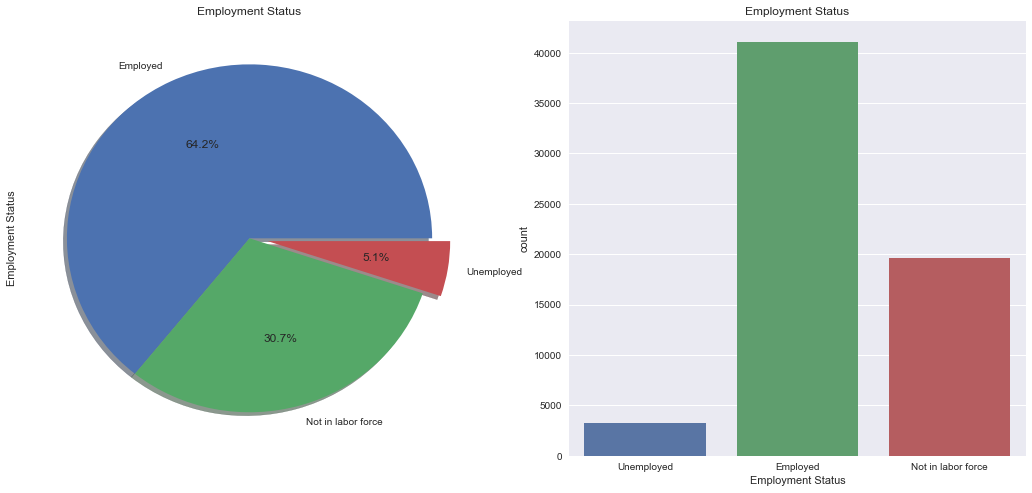

In [8]:
# Distribution of Employment Status
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Employment Status'].value_counts().plot.pie(explode=[0,0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Employment Status')
sns.countplot('Employment Status', data=df_train, ax=ax[1])
ax[1].set_title('Employment Status')
plt.show()

Looks like the majority of people are/were employed according to this data. The account for 64.2% of the sample size, which is quite high given 3 classes. 30.7% of people are/were 'Not in labor force', while only 5.1% of the entire population(sample) were unemployed.  
  
Well, that gives a good overview of the overall distribution of our target variable. But, how each of the other features affect this target variable. We'll need to dive deep into the data for that. Let's proceed.

## Feature - Analysis

### Education Level : Categorical Variable

In [9]:
# Distribution of Employment Status across Education Level
df_train.groupby(['Education Level', 'Employment Status'])['Employment Status'].count()

Education Level   Employment Status 
10th grade        Employed                828
                  Not in labor force     1273
                  Unemployed              289
11th grade        Employed               1061
                  Not in labor force     1071
                  Unemployed              308
12th grade        Employed                397
                  Not in labor force      296
                  Unemployed               63
9th grade         Employed                687
                  Not in labor force     1155
                  Unemployed              238
Associate Degree  Employed               4429
                  Not in labor force     1410
                  Unemployed              241
Bachelor          Employed               9930
                  Not in labor force     2752
                  Unemployed              360
Doctoral Degree   Employed                797
                  Not in labor force      170
                  Unemployed               

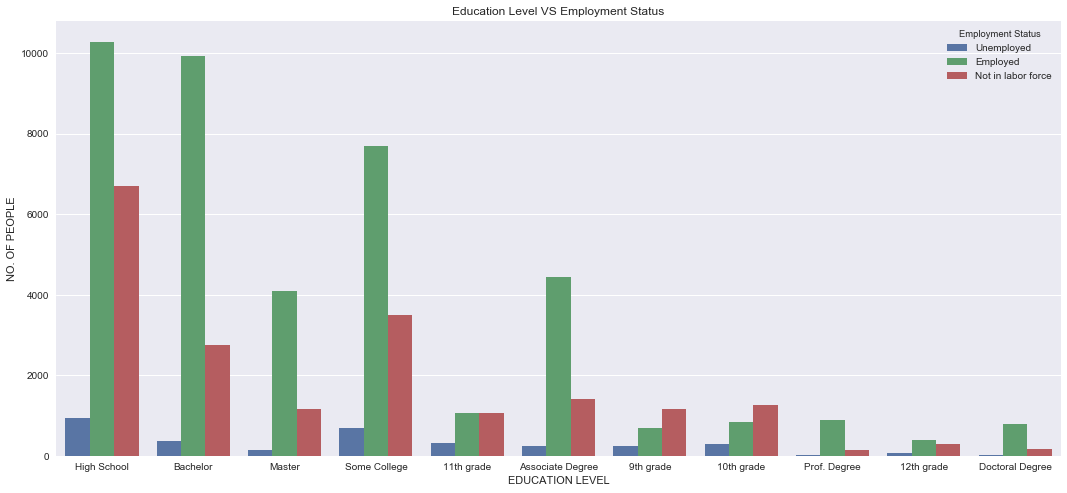

In [10]:
f, ax = plt.subplots(1, 1, figsize=(18,8))
sns.countplot('Education Level', hue='Employment Status', data=df_train, ax=ax)
ax.set_title('Education Level VS Employment Status')
ax.set_ylabel('NO. OF PEOPLE')
ax.set_xlabel('EDUCATION LEVEL')
plt.show()

### Gender

In [11]:
# Distribution of Gender across Employement Status
df_train.groupby(['Gender', 'Employment Status'])['Employment Status'].count() 

Gender  Employment Status 
Female  Employed              21206
        Not in labor force    13194
        Unemployed             1732
Male    Employed              19892
        Not in labor force     6436
        Unemployed             1546
Name: Employment Status, dtype: int64

In [12]:
# Male-to-Female ratio in the data
df_train['Gender'].value_counts()/len(df_train)*100

Female    56.450958
Male      43.549042
Name: Gender, dtype: float64

As far as the data is concerned, the gender looks to be quite evenly distributed, as in the Male Percentage and Female Percentage are nearly equal. No one particular gender has majority of samples

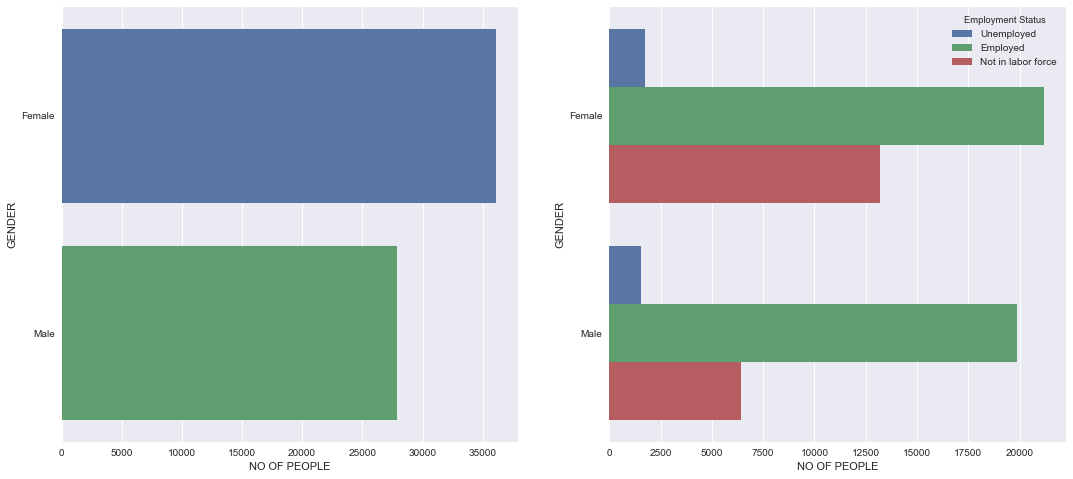

In [13]:
# Visualization for same
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot(y='Gender', data=df_train, ax=ax[0])
ax[0].set_ylabel('GENDER')
ax[0].set_xlabel('NO OF PEOPLE')
sns.countplot(y='Gender', hue='Employment Status', data=df_train, ax=ax[1])
ax[1].set_ylabel('GENDER')
ax[1].set_xlabel('NO OF PEOPLE')
plt.show()

Distribution looks kind of even across both the GENDERs as far as EMPLOYMENT STATUS is concerned. For both the genders (Male and Female), number of people that are 'EMPLOYED' is highest compared to other classes. There is a common trend for both the genders. For both the genders,  
**No of people (EMPLOYED) > No of people (NOT IN LABOR FORCE) > No of people (UNEMPLOYED)**

### Year : Categorical

In [14]:
# Year distribution across Employment Status
df_train['Year'].value_counts().sort_values()

2005    7999
2012    8001
2011    8001
2010    8001
2009    8001
2008    8001
2007    8001
2006    8001
Name: Year, dtype: int64

For each year we have almost equal number of samples  

#### Year VS Employment Status

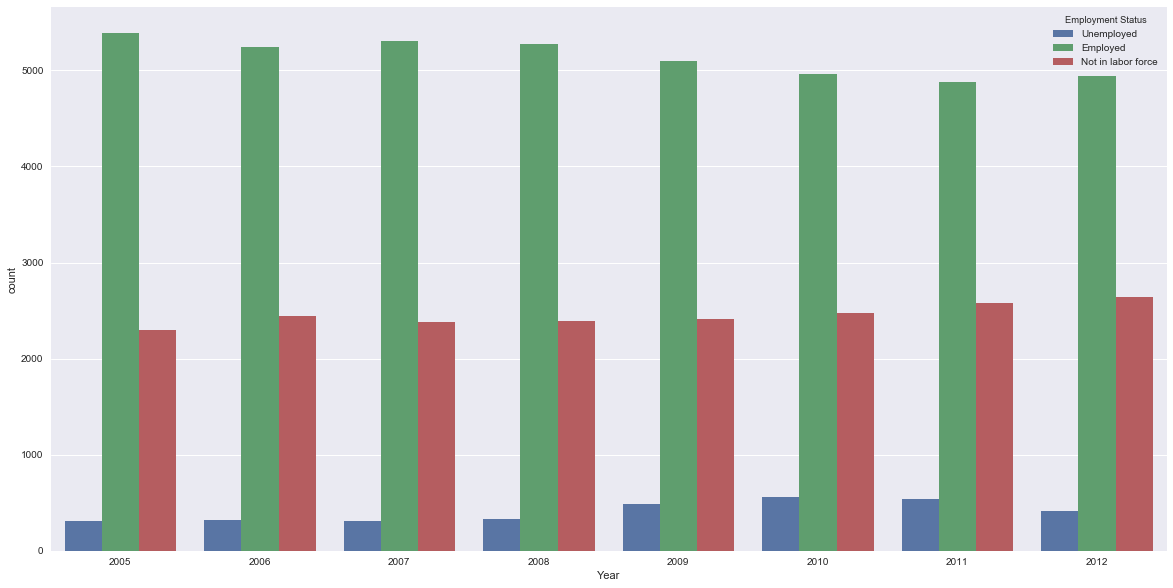

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
sns.countplot(x='Year', hue='Employment Status', data=df_train, ax=ax)
plt.show()

Number of **UNEMPLOYED** people have increased over the years on average.

Number of **EMPLOYED** people have decreased over the years on average.

Number of people **NOT IN LABOR FORCE** have increased over the years on average.  

### Age Range : Categorical

In [16]:
# Age Range distribution across Employment Status
df_train['Age Range'].value_counts()

40-49    13348
30-39    12940
50-59    10836
60-69     7799
20-29     7706
70-79     4719
0-19      3973
80+       2685
Name: Age Range, dtype: int64

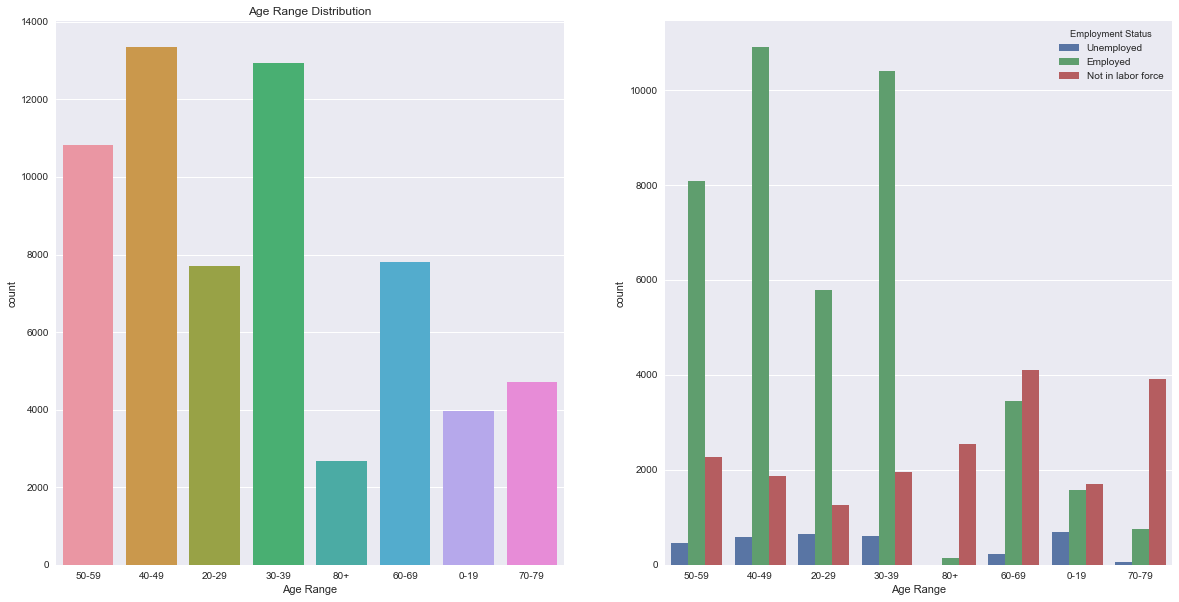

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot('Age Range', data=df_train, ax=ax[0])
ax[0].set_title('Age Range Distribution')
sns.countplot('Age Range', hue='Employment Status', data=df_train, ax=ax[1])
plt.show()

Looks interesting. Investigate into it TEAM!

### Children : Categorical

In [18]:
# Children distribution
df_train['Children'].value_counts().sort_values(ascending=False)

0     33571
1     12552
2     11680
3      4409
4      1304
5       332
6       108
7        29
8        14
9         3
10        2
11        1
12        1
Name: Children, dtype: int64

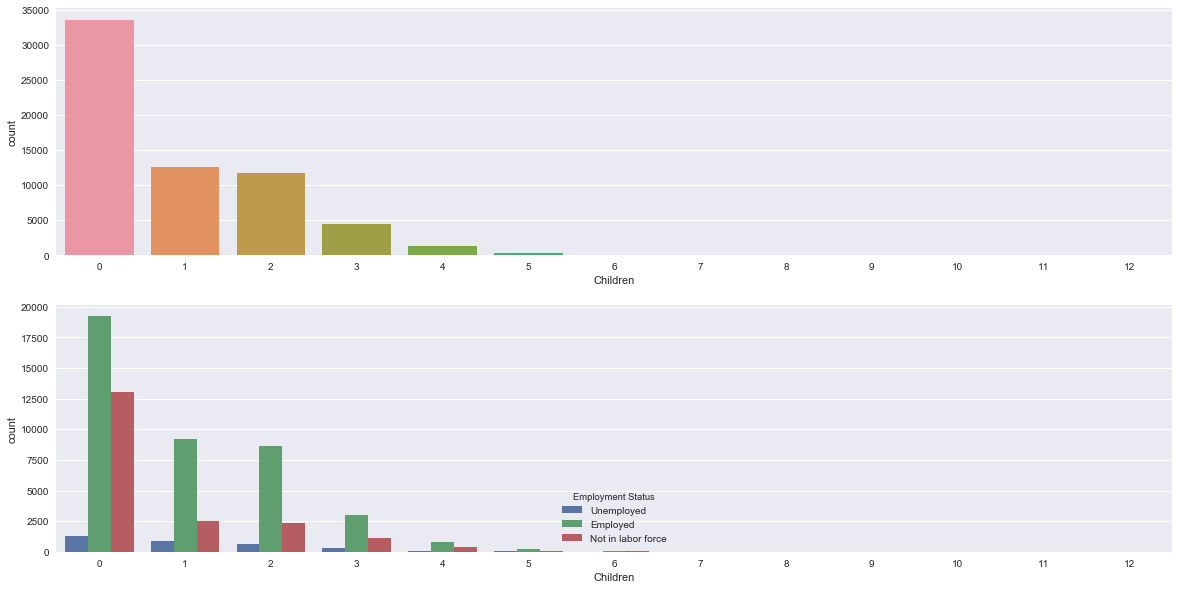

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot('Children', data=df_train, ax=ax[0])
sns.countplot('Children', hue='Employment Status', data=df_train, ax=ax[1])
plt.show()

Team, Interpret!

### Weekly Earnings : Continuous Variable

In [20]:
print('Maximum Weekle Earning is : ', df_train['Weekly Earnings'].max())
print('Minimum Weekle Earning is : ', df_train['Weekly Earnings'].min())
print('Average Weekle Earning is : ', df_train['Weekly Earnings'].mean())

Maximum Weekle Earning is :  2885
Minimum Weekle Earning is :  0
Average Weekle Earning is :  485.69787207449303


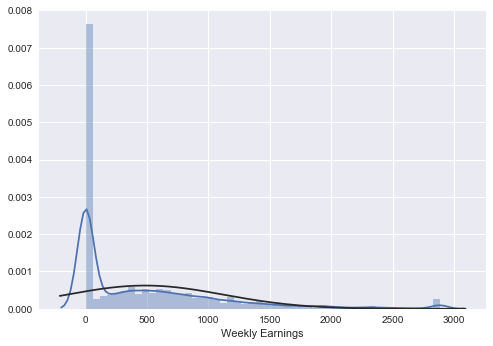

In [24]:
sns.distplot(df_train['Weekly Earnings'], fit=norm)
plt.show()

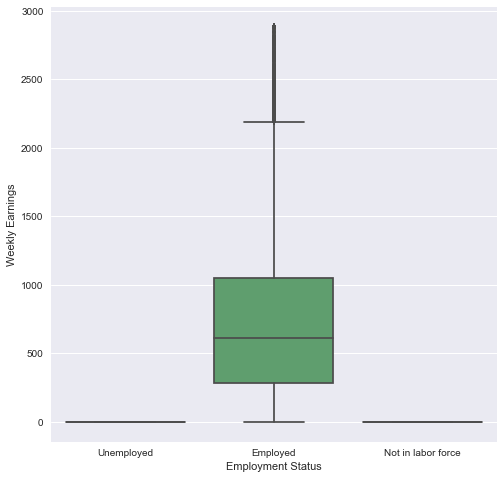

In [25]:
var = 'Weekly Earnings'
data = pd.concat([df_train['Weekly Earnings'], df_train['Employment Status']], axis=1)
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(y=var, x='Employment Status', data=data, ax=ax)
plt.show()

## Question 1
Summary of time spending pattern in 2014 (like time spend per activity e.g. Socializing, eating, working, etc.)

In [32]:
df_2012 = df_train[df_train['Year']==2012]
df_2012.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
56005,56006,High School,38,30-39,Unemployed,Female,2,0,2012,0,...,0,0,5,60,528,528,0,0,0,32.516667
56006,56007,10th grade,17,0-19,Unemployed,Female,4,0,2012,0,...,90,0,0,60,120,120,0,0,0,21.250000
56007,56008,Some College,20,20-29,Employed,Female,1,308,2012,0,...,0,0,0,55,13,13,0,0,0,7.683333
56008,56009,9th grade,58,50-59,Employed,Male,0,0,2012,40,...,0,0,10,160,588,474,0,0,0,30.900000
56009,56010,9th grade,65,60-69,Employed,Female,0,200,2012,16,...,0,0,120,40,415,0,0,0,0,13.000000


In [33]:
print('Total number of samples for year 2012:', len(df_2012))

Total number of samples for year 2012: 8001


In [63]:
df_2012.loc[:,'Sleeping':'Volunteering'].describe()

,Sleeping,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,529.529059,40.398450,41.434196,33.162480,27.573053,8.819523,2.126734,22.671791,69.342582,298.217223,173.290089,1.494813,0.813398,9.238720
std,136.842247,37.537744,85.607682,51.083381,73.774655,39.815637,24.880026,46.581834,54.127234,210.976769,176.253953,19.688588,8.449027,45.978832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,450.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,134.000000,30.000000,0.000000,0.000000,0.000000
50%,520.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,60.000000,260.000000,120.000000,0.000000,0.000000,0.000000
75%,600.000000,60.000000,50.000000,50.000000,0.000000,0.000000,0.000000,25.000000,90.000000,428.000000,252.000000,0.000000,0.000000,0.000000
max,1410.000000,495.000000,1405.000000,627.000000,950.000000,840.000000,750.000000,520.000000,718.000000,1350.000000,1255.000000,400.000000,330.000000,795.000000


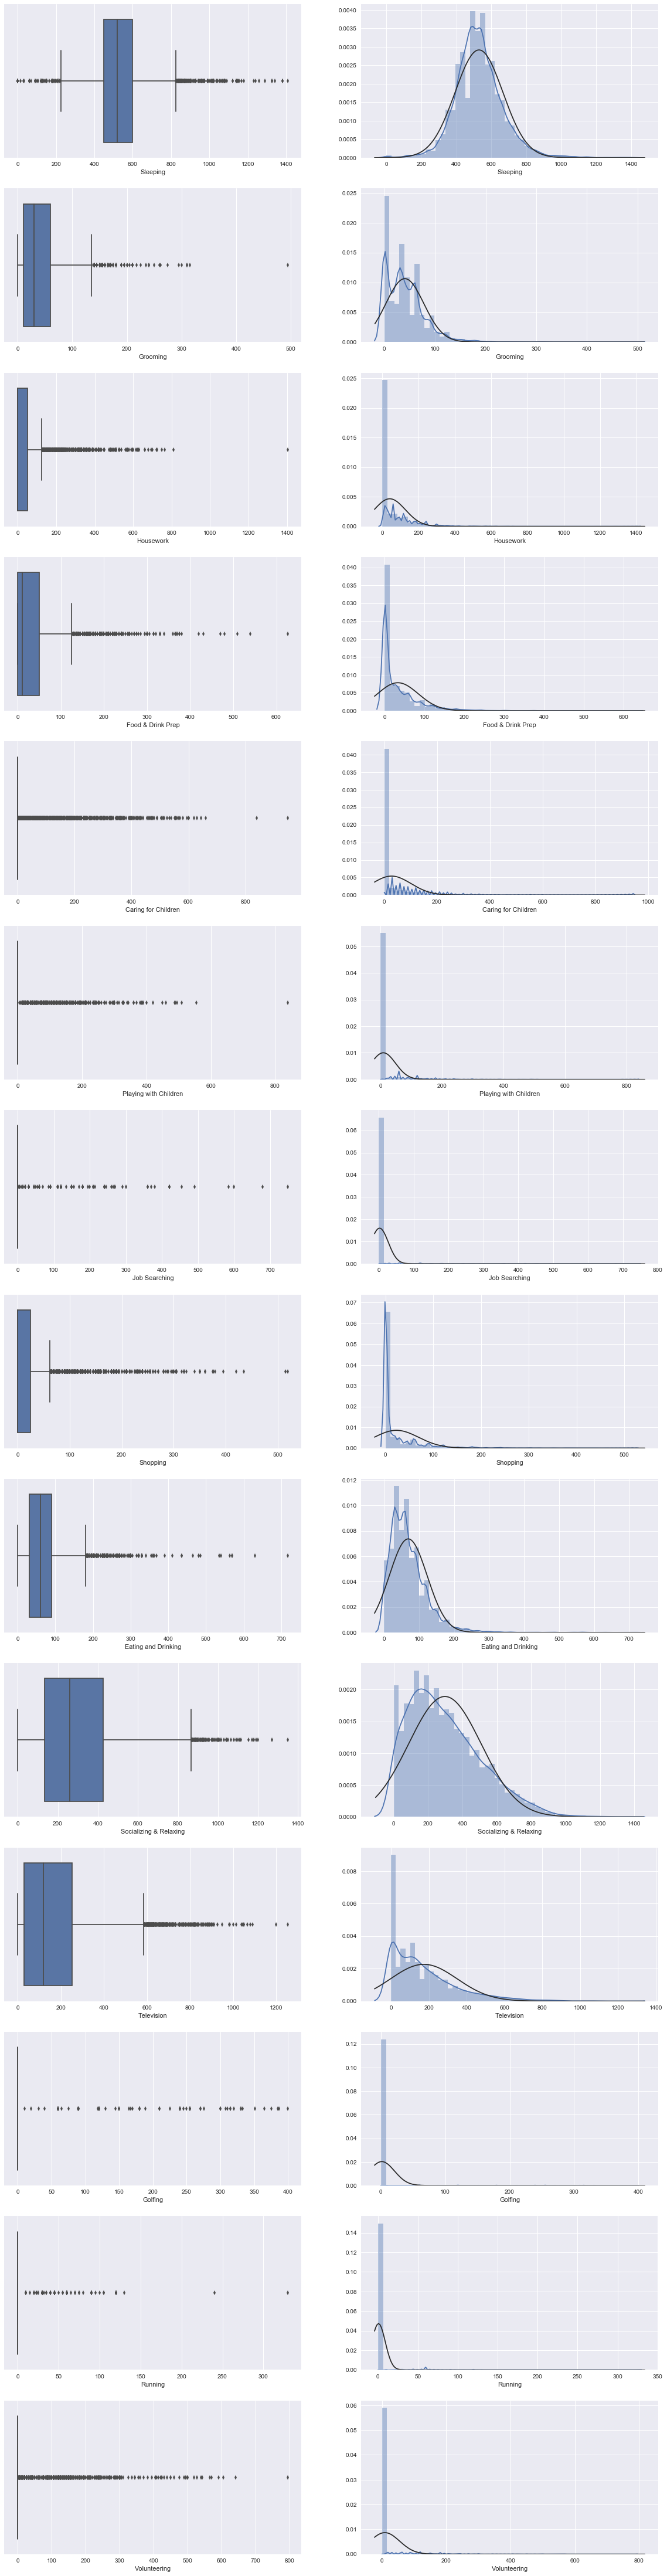

In [83]:
f, ax = plt.subplots(14, 2, figsize=(20, 80))

activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(activity, data=df_2012, ax=ax[i, 0])
    sns.distplot(df_2012[activity], fit=norm, ax=ax[i, 1])
    i+=1
plt.show()

## Question 2
How does the spending time in question 1 changes based on age, working status, education level etc.?

### a) Change in SPENDING TIME based on AGE

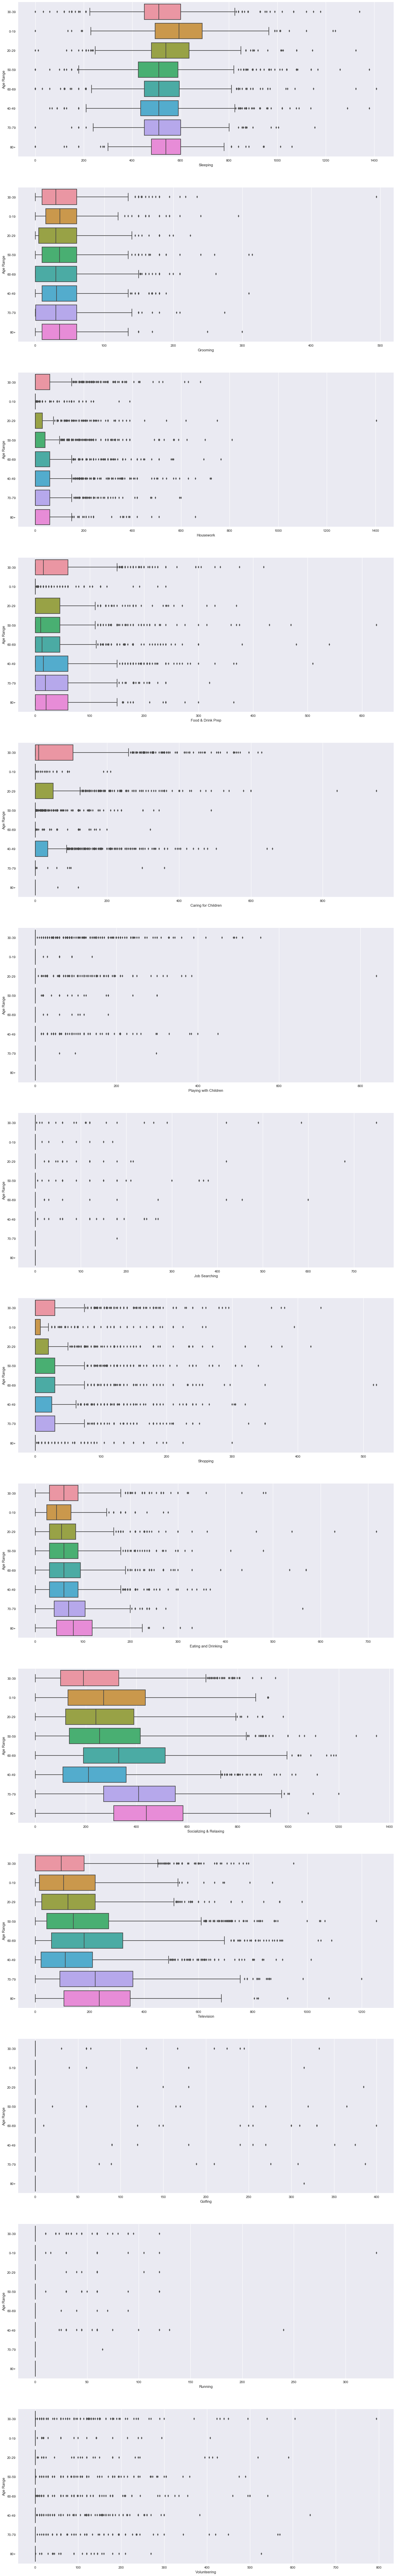

In [84]:
f, ax = plt.subplots(14, 1, figsize=(20, 140))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(y='Age Range', x=activity, data=df_2012, ax=ax[i])
    i+=1
plt.show()